# Homework 7: Applied Machine Learning

## Logistic Regression

Josh Gregory

## Canvas assignment instructions

For HW 7, use the roadmap for building machine learning systems and the sklearn library, train a LogisticRegression algorithm.  For full credit perfrom steps 1 - 6 cleary marked and annotated  in your .ipynb.

Create a CM and analyze the results.

After you have completed HW 7 upload and submit your files.

For notebook assignments, you will always turn in your .ipynb notebook file and an HTML file of the notebook.

For HTML: Click File → Save and Export Notebook As → HTML to make a nice HTML of the notebook.

For .ipynb: Click File → Download

Turn in both the .ipynb and .html files in Canvas.

In [1]:
from IPython.display import Image
%matplotlib inline

#importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import tree, preprocessing
import seaborn as sns
sns.set()

In [2]:
digits = pd.read_csv('digits_8K.csv')

digits.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Perform EDA according to ICHW 1

### 1. Find the different classes, number of classes, and the number of samples within each class from ICHW1/HW1

In [3]:
classes = pd.unique(digits['label'])
num_classes = len(classes)
each_class = digits['label'].value_counts()

print(classes)
print(num_classes)
print(each_class)

print(digits.info())

[7 2 1 0 4 9 5 6 3 8]
10
label
1    909
2    837
9    823
7    816
3    807
4    791
8    791
0    778
6    759
5    725
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8036 entries, 0 to 8035
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 48.1 MB
None


**What are the names of the features?**
The features don't really have names, since they are each pixels ranging in intensity from 0-255.

**What are the types of features?**
All of the features are continuous integer pixel values from 0-255.

**How many samples do we have?**
There are 8036 samples.
    
**How many features do we have?**
Since each digit is an array that is 28x28, there are 28x28=784 total features.

**What are the classes?**
The classes are the digits from 0-9.

**How many classes do we have?**
10, digits from 0-9.
    
    
**How many samples of each class? are they balanced?**
0    778
1    909
2    837
3    807
4    791
5    725
6    759
7    816
8    791
9    823


Because some classes have more than others (i.e. the label of 1 has more than 0), these classes are not balanced.

### 2. Check missing values, outliers and statistics

In [4]:
digits.isna().apply(pd.value_counts)

/tmp/ipykernel_7550/2169608385.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  digits.isna().apply(pd.value_counts)


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
False,8036,8036,8036,8036,8036,8036,8036,8036,8036,8036,...,8036,8036,8036,8036,8036,8036,8036,8036,8036,8036


### Answers to questions

**Are there any missing values?**
No. Since the previous line returned `False`, there are no values that are missing. Therefore, nothing needs to be done. To get rid of outliers.

**Are there anomolies in the statistics?**
No. Each pixel can range from 0-255, so there aren't any anomolies. We can also see this from the next cell below.

**Are there outliers?**
No. Each pixel can range from 0-255, so there can't be any outliers.

**Note**: I didn't make a boxplot since there would be 784 boxplots, which is a bit excessive and doesn't really show us anything helpful.

In [5]:
digits.describe().T

,count,mean,std,min,25%,50%,75%,max
label,8036.0,4.454206,2.897591,0.0,2.0,4.0,7.0,9.0
1x1,8036.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1x2,8036.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1x3,8036.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1x4,8036.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
28x24,8036.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
28x25,8036.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
28x26,8036.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
28x27,8036.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


### 3. Check distributions and coorelations

It doesn't really make sense to do this step, since digits are only going to be correlated with the same digit.

On top of that, when trying to run the `sns.pairplot` and `sns.heatmap` commands, the notebook doesn't have enough computing resources.

## Logistic Regression Model Implementation

In [6]:
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split

### 1. Splitting the data into targets and features:

In [7]:
X = digits.iloc[:, 1:785]
y = digits.iloc[:, 0]

### 2. Split the data into training and testing sets:

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                            test_size=0.3, random_state=42, stratify=y)

Check a few of the digits to make sure they're coming out correctly:

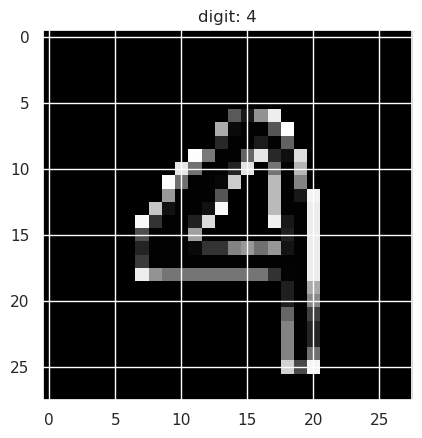

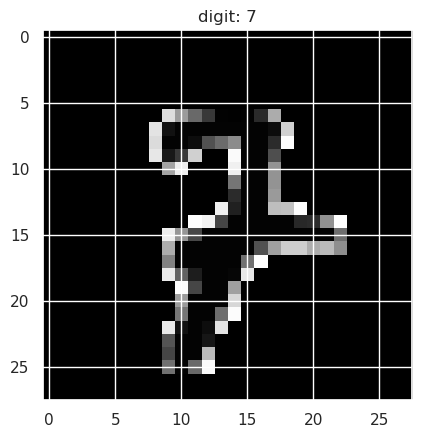

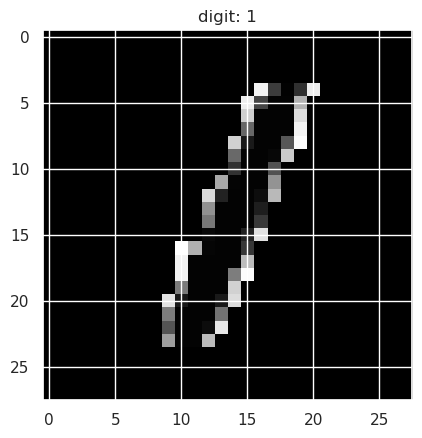

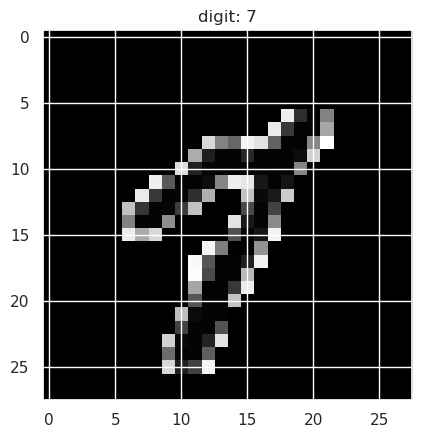

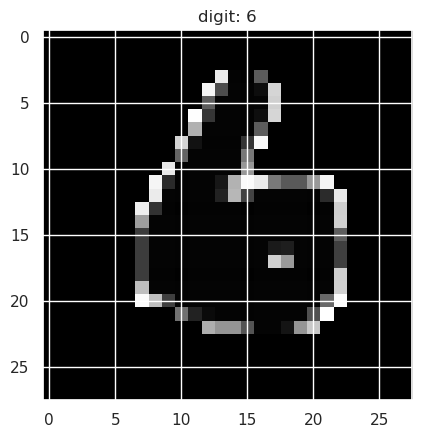

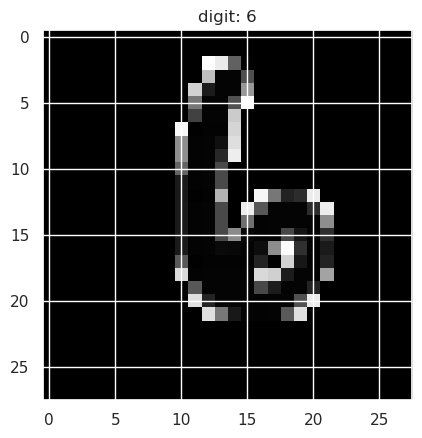

In [9]:
for i in (np.random.randint(0,270,6)):
    two_d = (np.reshape(X_test.values[i], (28, 28)) * 255).astype(np.uint8)
    plt.title('digit: {0}'. format(y_test.values[i]))
    plt.imshow(two_d, interpolation='nearest', cmap='gray')
    plt.show()

### 3. Select the ML algorithm and parameters

Import the `LogisticRegression` class from SkLearn:

In [10]:
from sklearn.linear_model import LogisticRegression

### 4. Build the model (.fit)

Instantiate the model:

In [11]:
logreg = LogisticRegression(random_state=42, n_jobs=-1, verbose=True)

# Fit the model with training data

logreg.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         7850     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.30259D+00    |proj g|=  1.70336D+01


 This problem is unconstrained.



At iterate   50    f=  9.35782D-02    |proj g|=  2.97191D-01

At iterate  100    f=  1.98463D-03    |proj g|=  9.71141D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 7850    100    112      1     0     0   9.711D-02   1.985D-03
  F =   1.9846343049727600E-003

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/home/josh/anaconda3/envs/applied_ml/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(n_jobs=-1, random_state=42, verbose=True)

### 5. Apply the model to the test data (.predict)

In [12]:
y_pred = logreg.predict(X_test)

### 6. Estimate performance (accuracy score and confusion matrix)

Print the confusion matrix and other metrics:

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

print('Test Accuracy: %.3f' % logreg.score(X_test, y_test))

Test Accuracy: 0.868


In [14]:
confmat = confusion_matrix(y_test, y_pred)

print(confmat)

[[220   0   2   0   1   4   4   0   1   1]
 [  0 263   3   1   0   3   0   0   2   1]
 [  1   2 215  11   0   3   5   4   7   3]
 [  1   0   6 213   0  15   1   1   2   3]
 [  0   1  12   2 197   3   3   2   3  14]
 [  0   1   1  11   5 172   2   7  16   3]
 [  2   1   3   0   0   4 213   2   3   0]
 [  1   6   9   2   5   0   0 212   2   8]
 [  2   3   7  18   3  15   2   2 180   5]
 [  2   4   4   6   8   2   0   9   5 207]]


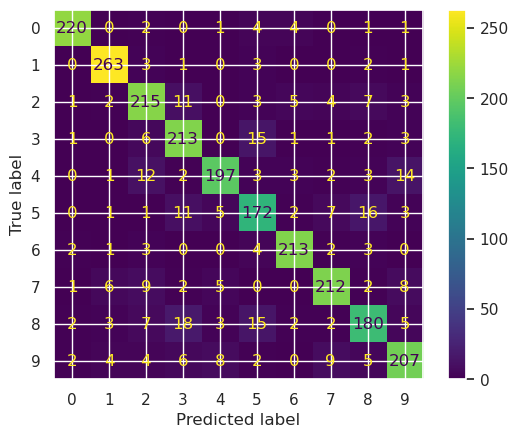

In [15]:
cmd = ConfusionMatrixDisplay(confmat)
cmd.plot()

The confusion matrix is telling us that we have a model that is able to predict relatively well at classifying different digits. The most confused digits are the model predicting a 3 when it is an 8 (18 instances), and an 8 when the label is an 5 (16 instances). Overall, in the context of this task, 86.8% accuracy is pretty good, however there are probably different things to change that could make this specific model perform better (mostly being hyperparameter optimization, which was not performed).